In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data

Load the data

In [2]:
df=pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

Reverse the order of the data, some plottings will go better if the oldest dates are on top of the dataframe.

In [3]:
df=df.iloc[::-1]

Also, stripping out the year and turning the date into a string will simplify plotting.

In [4]:
df['Date']=df['date'].astype(str).str[5:]
df['DateTime']=pd.to_datetime(df['date'], format='%Y%m%d')

# Question 1:  How many states?

How many different "states" are there?

In [5]:
print(np.unique(df['state']))
print('There are %d unique state entries, must be including territories.'%len(np.unique(df['state'])))

['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
There are 56 unique state entries, must be including territories.


# Question 2: Which 5 states have highest positive testing rate?

First we will make a new dataframe that has just the states, positives, negatives, and the positive fraction.

In [6]:
posneg=df.groupby(['state']).aggregate({'positive':np.max, 'negative':np.max}).reset_index()
posneg['PositiveRatio']=posneg['positive']/(posneg['positive']+posneg['negative'])
posneg.head()

,state,positive,negative,PositiveRatio
0,AK,664.0,73773.0,0.008920
1,AL,26272.0,276402.0,0.086800
2,AR,12917.0,191221.0,0.063276
3,AS,0.0,174.0,0.000000
4,AZ,36705.0,308552.0,0.106312


Now find the 5 highest ratios.

In [7]:
posneg.sort_values(by='PositiveRatio', ascending=False)[0:5][['state', 'PositiveRatio']]

,state,PositiveRatio
42,PR,0.387424
34,NJ,0.149723
8,DC,0.148817
21,MA,0.147358
22,MD,0.147307


# Question 3:  Plot daily death toll for whole country

Let's plot daily death toll for the whole country.

Text(0.5, 1.0, 'US Daily Death Toll')

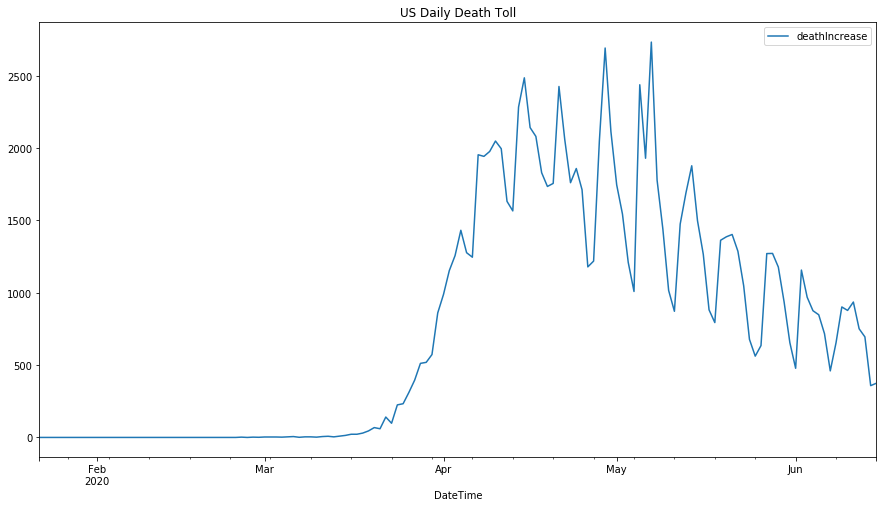

In [8]:
df.groupby('DateTime').aggregate({'deathIncrease':np.sum}).plot(figsize=[15,8])
plt.title('US Daily Death Toll')

# Question 4:  Plot daily death toll for just Kansas and Missouri

Now let's focus on Missouri and Kansas, first we will graph their combined totals.

Text(0.5, 1.0, 'Missouri + Kansas Daily Death Toll')

<Figure size 1080x576 with 0 Axes>

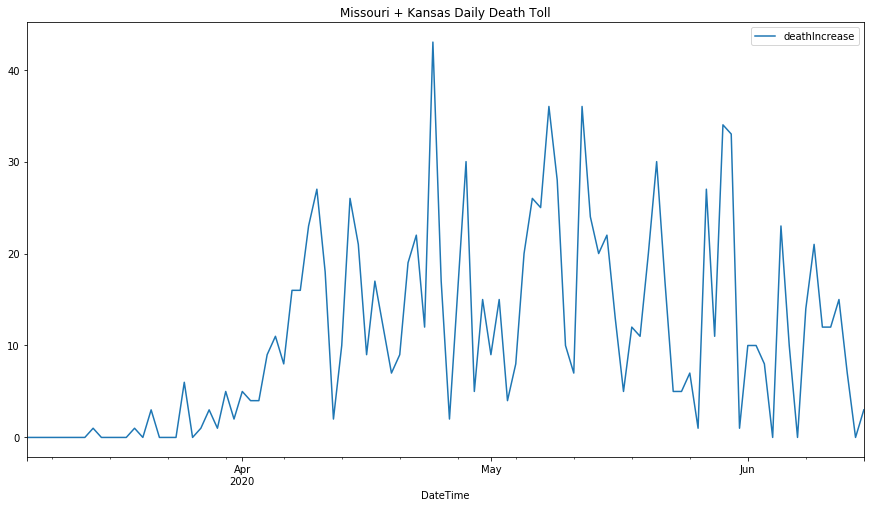

In [9]:
plt.figure(figsize=[15,8])
df[df['state'].isin(['MO', 'KS'])].groupby('DateTime').aggregate({'deathIncrease':np.sum}).plot(figsize=[15,8])
plt.title('Missouri + Kansas Daily Death Toll')

Now let's separate them out.

Text(0.5, 1.0, 'Missouri and Kansas Daily Death Toll')

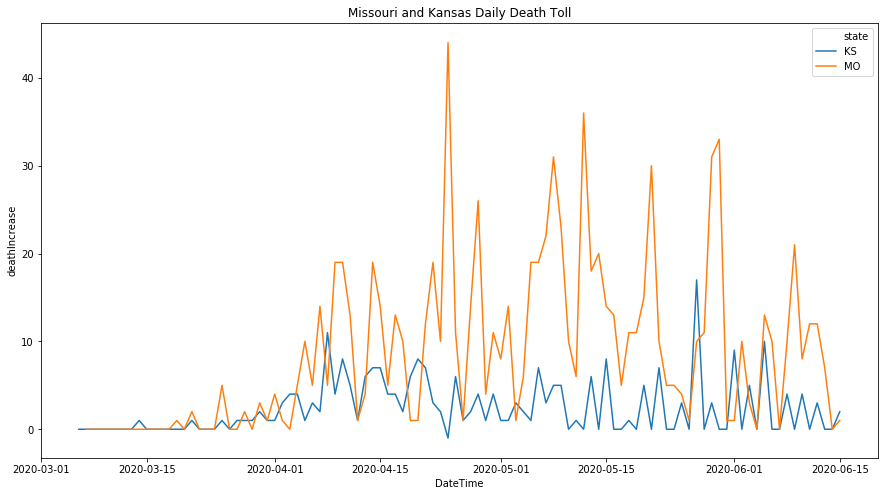

In [10]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df[df['state'].isin(['MO', 'KS'])], x='DateTime', y='deathIncrease', hue='state')
plt.title('Missouri and Kansas Daily Death Toll')

# Question 5:  Plot the daily testing rate for Kansas and Missouri

What is the daily testing rate looking like for Kansas and Missouri?

Text(0.5, 1.0, 'Missouri + Kansas Daily Testings')

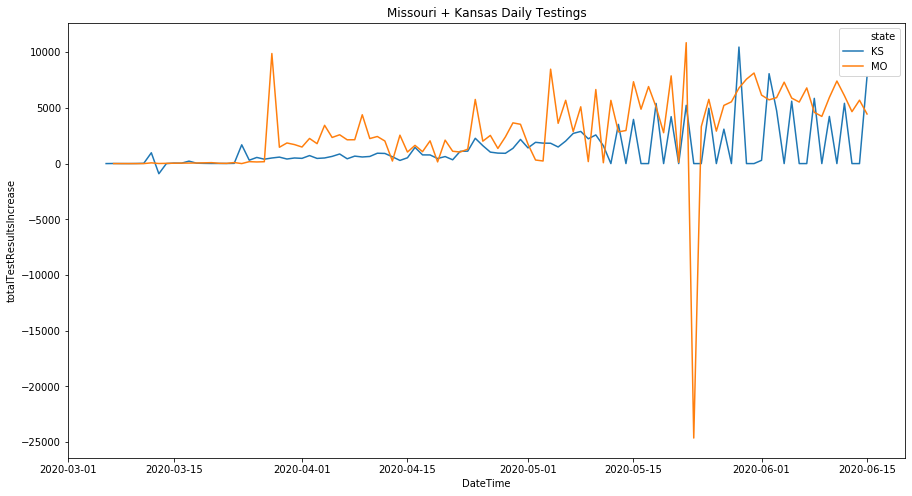

In [11]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df[df['state'].isin(['MO', 'KS'])], x='DateTime', y='totalTestResultsIncrease', hue='state')
plt.title('Missouri + Kansas Daily Testings')

# Question 6:  Make a table of peak testing day for each state

In [12]:
df.groupby(['state']).apply(lambda x: x.loc[np.argmax(x['totalTestResultsIncrease']), ['totalTestResultsIncrease','DateTime']]).sort_values(by='DateTime')


/Users/sam/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


,totalTestResultsIncrease,DateTime
state,,
PR,630,2020-04-04
UT,6093,2020-04-17
CA,165227,2020-04-22
AK,3451,2020-04-25
AL,18649,2020-04-25
WV,6097,2020-04-26
ID,8330,2020-04-29
AS,54,2020-05-01
GU,897,2020-05-01


# Question 8:  What is the peak death day for the whole country?

In [13]:
agged_df=df.groupby(['DateTime']).aggregate({'deathIncrease':np.sum}).reset_index()
agged_df.loc[np.argmax(agged_df['deathIncrease'])]

DateTime         2020-05-07 00:00:00
deathIncrease                   2733
Name: 106, dtype: object

So far it is April 21, on which 2674 died.

# Challenge:  Plot the per capita testing fraction in descending order

First let's make a new dataframe that simply aggregates the total tests per state.

In [14]:
tests_agged=df.groupby(['state']).agg({'totalTestResultsIncrease':np.sum}).reset_index()

Now let's read in the population data, and keep only the parts we want.

In [15]:
pop=pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv', usecols=['NAME', 'CENSUS2010POP'])

Now the problem is that our tests_agged has state abbreviations and our pop dataframe has full state names.  We need to convert one to the other before we can merge.

First let's load a file that has both.

In [16]:
abb=pd.read_csv('http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')

Then we will make a dictionary that takes abbreviations and turns them into the full state names.

In [17]:
mapper={a:b for a,b in zip(abb['Abbreviation'], abb['State'])}

Now that we have a dictionary, we can create a new column in tests_agged and use .map to generate it.

In [18]:
tests_agged['StateNames']=tests_agged['state'].map(mapper)

Now we can merge the tests_agged and pop dataframes because they both have a column with the full state name in them.

In [19]:
tests_agged=tests_agged.merge(pop, left_on='StateNames', right_on='NAME')

Calculate the per 1000 tests, add to a column

In [20]:
tests_agged['PerThousand']=tests_agged['totalTestResultsIncrease']/tests_agged['CENSUS2010POP']*1000

Sort, show the top 5.

In [21]:
tests_agged.sort_values(by='PerThousand', ascending=False)[0:5].loc[:,['NAME', 'PerThousand']]

,NAME,PerThousand
39,Rhode Island,190.433483
34,New York,154.357532
28,North Dakota,130.504274
32,New Mexico,128.035979
31,New Jersey,126.944433


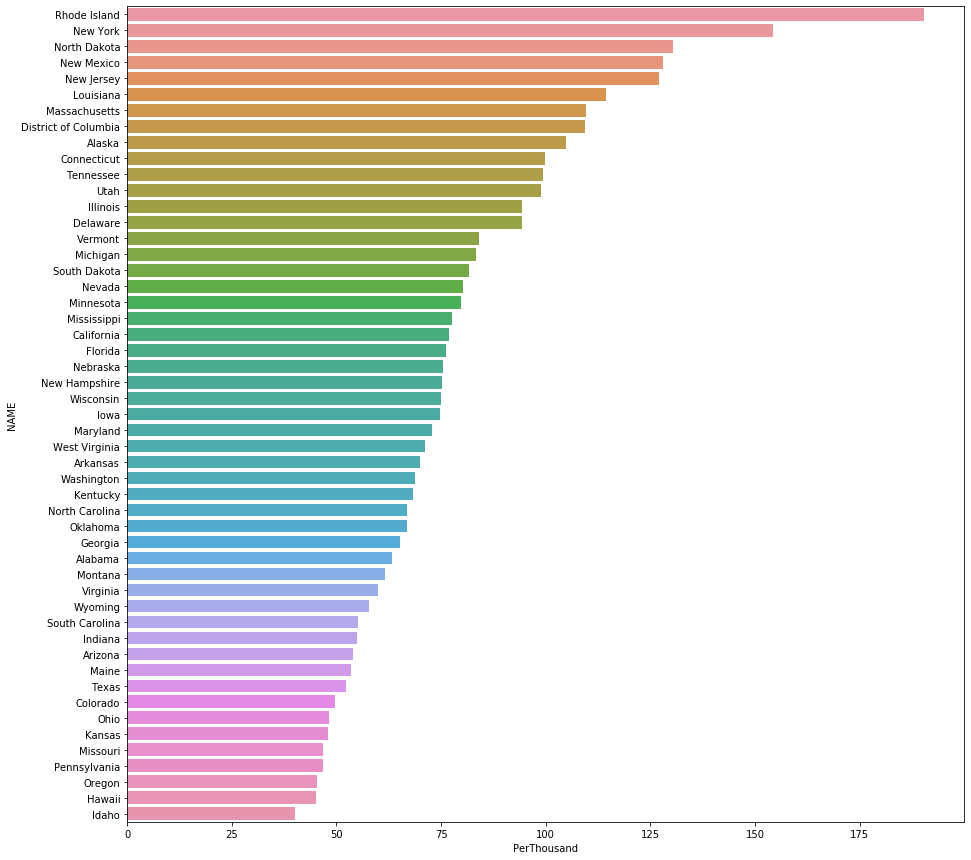

In [22]:
plt.figure(figsize=[15,15])
sns.barplot(data=tests_agged.sort_values(by='PerThousand', ascending=False), x='PerThousand', y='NAME')